# Step 2: Classify the fashion images and compare classification methods by doing the following:
   ### 1. Import the Fashion MNIST dataset from Keras

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

   ### 2. Make plots of images from each of the 10 classes to see exactly what data it is that you're working with.

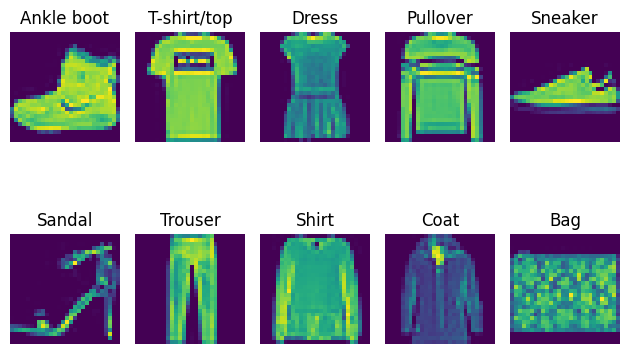

In [2]:
import matplotlib.pyplot as plt

shown_classes = set()
i = 0
shown = 0

while shown < 10 and i < len(x_train):
    label = y_train[i]

    if label not in shown_classes:
        shown_classes.add(label)

        plt.subplot(2, 5, shown + 1)
        plt.imshow(x_train[i])
        plt.title(class_names[label])
        plt.axis("off")

        shown += 1
    i += 1

plt.tight_layout()
plt.show()

   ### 3. Determine if there is a class imbalance 
   (i.e. if you look at the numbers of elements for each class, how unequal are they?)

In [3]:
i = 0
count = [0] * 10

while i < len(x_train):
    label = y_train[i]

    if label <5:
        if label <3:
            if label <1: count[0]+=1
            elif label ==1: count[1]+=1
            else: count[2]+=1
        elif label ==3: count[3]+=1
        else: count[4]+=1
    elif label <8:
        if label <6: count[5]+=1
        elif label ==6: count[6]+=1
        else: count[7]+=1
    elif label == 8: count[8]+=1
    else: count[9]+=1
    i+=1

for i in range(10):
    print(class_names[i] + ":", count[i])

T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


Answer: The training dataset is fully balanced, with 6000 examples of each class.

   ### 4. Perform classification on this dataset with the following methods, for each method, choose just one specific initial configuration (that is, one value for any hyperparameters, layer configuration, optimizer, etc) and train them.
For CNN, you should include at least one convolutional layer and one pooling layer

##### 4.1. Logistic Regression:

In [ ]:
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model1 = sklearn.linear_model.LogisticRegression(max_iter=1000)
model1.fit(x_train_scaled, y_train)

C:\Users\dorte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

##### 4.2. Naive Bayes:

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
x_train_NB = scaler.fit_transform(x_train)
x_test_NB = scaler.transform(x_test)

model2 = MultinomialNB(alpha=1.0)
model2.fit(x_train_NB, y_train)

MultinomialNB()

##### 4.3. Random Forest:

In [6]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model3.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

##### 4.4. Dense Neural Network:

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model4 = Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model4.fit(x_train_scaled, y_train, 
                    epochs=10, 
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8076 - loss: 0.5439 - val_accuracy: 0.8605 - val_loss: 0.3699
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8767 - loss: 0.3359 - val_accuracy: 0.8745 - val_loss: 0.3473
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2890 - val_accuracy: 0.8783 - val_loss: 0.3312
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9018 - loss: 0.2651 - val_accuracy: 0.8852 - val_loss: 0.3211
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.2426 - val_accuracy: 0.8827 - val_loss: 0.3283
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9150 - loss: 0.2237 - val_accuracy: 0.8752 - val_loss: 0.3457
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9208 - loss: 0.2071 - val_accuracy: 0.8853 - val_loss: 0.3500
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9278 - loss: 0.1930 - 

##### 4.5. Convolutional Neural Network:

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

x_train_CNN = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_CNN = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

model5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model5.fit(x_train_CNN, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

C:\Users\dorte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7509 - loss: 0.6868 - val_accuracy: 0.8610 - val_loss: 0.3862
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8734 - loss: 0.3552 - val_accuracy: 0.8872 - val_loss: 0.3214
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8925 - loss: 0.3007 - val_accuracy: 0.8900 - val_loss: 0.2992
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8966 - loss: 0.2802 - val_accuracy: 0.8913 - val_loss: 0.2891
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9087 - loss: 0.2499 - val_accuracy: 0.9023 - val_loss: 0.2598
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9147 - loss: 0.2320 - val_accuracy: 0.8998 - val_loss: 0.2718
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9215 - loss: 0.2182 - val_accuracy: 0.9057 - val_loss: 0.2654
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9249 - loss: 0.

### 5. Use Scikit-Learn's classification report to evaluate all 5 models for precision, recall, and accuracy for all classes
· Compare the results of the 5 methods.

· Which class (or classes) do the classifiers perform best on? and worst on?

In [9]:
import numpy as np
from sklearn.metrics import classification_report

# Logistic Regression
y_pred_lr = model1.predict(x_test_scaled)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

# Naive Bayes
y_pred_nb = model2.predict(x_test_NB)
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=class_names))

# Random Forest
y_pred_rf = model3.predict(x_test_scaled)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

# Dense Neural Network
y_pred_dnn = np.argmax(model4.predict(x_test), axis=1)
print("=== Dense Neural Network ===")
print(classification_report(y_test, y_pred_dnn, target_names=class_names))

# Convolutional Neural Network
y_pred_cnn = np.argmax(model5.predict(x_test_CNN), axis=1)
print("=== Convolutional Neural Network ===")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

=== Logistic Regression ===
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.80      0.80      1000
     Trouser       0.96      0.96      0.96      1000
    Pullover       0.72      0.72      0.72      1000
       Dress       0.81      0.85      0.83      1000
        Coat       0.73      0.75      0.74      1000
      Sandal       0.93      0.92      0.93      1000
       Shirt       0.61      0.56      0.58      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.91      0.92      0.92      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

=== Naive Bayes ===
              precision    recall  f1-score   support

 T-shirt/top       0.73      0.78      0.75      1000
     Trouser       0.99      0.87      0.93      1000
    Pullover       0.60      0

Answer: The results show that the Convolutional Neural Network (CNN) model obtained the best overall performance, with an average accuracy, recall and f1-score of 90 %, outperforming the rest of the models evaluated. It was followed by Random Forest, 88% accuracy, and Logistic Regression, 83%, both also showing strong and consistent performance, especially in classes such as Trouser, Sneaker, Bag and Ankle boot. Naive Bayes and Dense Neural Network obtained lower performances, 66 % and 70 % respectively, with notable problems in classes such as Shirt, which was consistently difficult to classify for all models, especially for Naive Bayes. The Trouser class was the easiest to correctly identify across all models, while Shirt and Pullover presented the greatest classification challenges, likely reflecting visual similarities between these garments. Overall, more complex models such as CNN offer distinct advantages in image classification tasks where spatial features are relevant.

### 6. Choose two hyperparameters for the Random Forest method and use grid search cross-validation to identify the optimal values for those hyperparameters.
You do NOT have to scan across many values for each hyperparameter.  This training could potentially take a long time -- I am only looking for you to demonstrate that you can follow through the process. 

Evaluate the model's performance when using the optimal hyperparameter values, and comment on how the performance metrics have changed relative to your initial configuration.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)

print("Optimal hyperparameter values:", grid_search.best_params_)

Optimal hyperparameter values: {'max_depth': None, 'n_estimators': 200}


In [11]:
RFOpHyper = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
RFOpHyper.fit(x_train_scaled, y_train)

# Original
y_pred_rf = model3.predict(x_test_scaled)
print("=== Original ===")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

# Optimal hyperparameter values
y_pred_rf = RFOpHyper.predict(x_test_scaled)
print("=== Optimal hyperparameter values ===")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

=== Original ===
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.58      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

=== Optimal hyperparameter values ===
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77

Answer: Although there are not very noticeable changes, it can be seen how some recall and f1-score values are improved by up to 0.01. This is due to the fact that only the number of estimates has been increased, since the maximum depth was already at the optimum value.

### 7. Do two additional variations on your original Dense Neural Network, one with a different number of layers and one with a different number of units for each layer.
Comment on how each variation changes the prediction accuracy on both the training data and the test data.

In [12]:
model_dense_v1 = Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_dense_v2 = Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\dorte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_dense_v1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_dense_v1 = model_dense_v1.fit(
    x_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8071 - loss: 0.5444 - val_accuracy: 0.8533 - val_loss: 0.3929
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8742 - loss: 0.3444 - val_accuracy: 0.8693 - val_loss: 0.3763
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8855 - loss: 0.3027 - val_accuracy: 0.8738 - val_loss: 0.3581
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2734 - val_accuracy: 0.8782 - val_loss: 0.3566
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9079 - loss: 0.2466 - val_accuracy: 0.8735 - val_loss: 0.3669
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9146 - loss: 0.2323 - val_accuracy: 0.8822 - val_loss: 0.3460
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9151 - loss: 0.2246 - val_accuracy: 0.8867 - val_loss: 0.3451
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.1988 - 

In [14]:
model_dense_v2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_dense_v2 = model_dense_v2.fit(
    x_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7921 - loss: 0.6054 - val_accuracy: 0.8693 - val_loss: 0.3702
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8711 - loss: 0.3528 - val_accuracy: 0.8682 - val_loss: 0.3606
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8853 - loss: 0.3086 - val_accuracy: 0.8800 - val_loss: 0.3387
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2798 - val_accuracy: 0.8812 - val_loss: 0.3475
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9041 - loss: 0.2593 - val_accuracy: 0.8815 - val_loss: 0.3420
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9098 - loss: 0.2436 - val_accuracy: 0.8848 - val_loss: 0.3393
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.2266 - val_accuracy: 0.8790 - val_loss: 0.3443
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2137 - 

In [15]:
# DNN Original
y_pred_dnn = np.argmax(model4.predict(x_test), axis=1)
print("=== DNN Original ===")
print(classification_report(y_test, y_pred_dnn, target_names=class_names))

# DNN Version 1
y_pred_dnn = np.argmax(model_dense_v1.predict(x_test), axis=1)
print("=== DNN Version 1 ===")
print(classification_report(y_test, y_pred_dnn, target_names=class_names))

# DNN Version 2
y_pred_dnn = np.argmax(model_dense_v2.predict(x_test), axis=1)
print("=== DNN Version 2 ===")
print(classification_report(y_test, y_pred_dnn, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
=== DNN Original ===
              precision    recall  f1-score   support

 T-shirt/top       0.70      0.57      0.63      1000
     Trouser       0.99      0.92      0.96      1000
    Pullover       0.48      0.50      0.49      1000
       Dress       0.83      0.74      0.78      1000
        Coat       0.52      0.68      0.59      1000
      Sandal       0.99      0.58      0.73      1000
       Shirt       0.39      0.56      0.46      1000
     Sneaker       0.81      0.83      0.82      1000
         Bag       0.78      0.85      0.82      1000
  Ankle boot       0.89      0.81      0.85      1000

    accuracy                           0.70     10000
   macro avg       0.74      0.70      0.71     10000
weighted avg       0.74      0.70      0.71     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
=== DNN Version 1 ===
              precision    recall  f1-score   support

 T-shirt/top       0.71      0.76      0.73      1000
   

Answer: Comparing the three versions of the dense neural network (DNN), it is observed that although they all achieve fairly high training accuracy (between 92.6 % and 93.7 %), their performance on the test set varies markedly, evidencing differences in their generalization ability. The Original DNN achieves a more stable balance between training (93.7 %) and testing (70 %), with moderate but consistent performance in most classes. In contrast, DNN Version 1, in which the number of layers is increased, despite an equally robust training (93.1 %), has a steeper drop in test (65 %), especially in classes such as Sneaker and Shirt, suggesting overfitting and possibly a less robust architecture. On the other hand, DNN Version 2, in which the number of units per layer is reduced, shows a significant improvement in the test set (75 %), with better results in difficult classes such as Shirt and Pullover, indicating that the adjustments made (reducing the units per layer by half) improved its generalization capability. In summary, although all networks learn the training set well, Version 2 achieves the best compromise between model complexity and accuracy on unseen data.









### 8. Do the same for the Convolutional Neural Network

In [16]:
model_cnn_v1 = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model_cnn_v2 = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

C:\Users\dorte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_cnn_v1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_v1 = model_cnn_v1.fit(
    x_train_CNN, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7581 - loss: 0.6633 - val_accuracy: 0.8742 - val_loss: 0.3409
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8885 - loss: 0.3091 - val_accuracy: 0.8983 - val_loss: 0.2768
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9088 - loss: 0.2522 - val_accuracy: 0.9078 - val_loss: 0.2494
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9191 - loss: 0.2207 - val_accuracy: 0.9102 - val_loss: 0.2483
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9290 - loss: 0.1986 - val_accuracy: 0.9122 - val_loss: 0.2463
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9341 - loss: 0.1772 - val_accuracy: 0.9180 - val_loss: 0.2380
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9426 - loss: 0.1570 - val_accuracy: 0.9187 - val_loss: 0.2302
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9508 -

In [18]:
model_cnn_v2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_v2 = model_cnn_v2.fit(
    x_train_CNN, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7235 - loss: 0.7669 - val_accuracy: 0.8372 - val_loss: 0.4315
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8691 - loss: 0.3740 - val_accuracy: 0.8723 - val_loss: 0.3520
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8810 - loss: 0.3325 - val_accuracy: 0.8843 - val_loss: 0.3282
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8922 - loss: 0.3032 - val_accuracy: 0.8882 - val_loss: 0.3087
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8988 - loss: 0.2830 - val_accuracy: 0.8940 - val_loss: 0.2905
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9016 - loss: 0.2723 - val_accuracy: 0.8892 - val_loss: 0.3092
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9094 - loss: 0.2508 - val_accuracy: 0.9008 - val_loss: 0.2759
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9155 - loss: 0.2359 - 

In [19]:
# CNN Original
y_pred_cnn = np.argmax(model5.predict(x_test_CNN), axis=1)
print("=== CNN Original ===")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

# CNN Version 1
y_pred_cnn = np.argmax(model_cnn_v1.predict(x_test_CNN), axis=1)
print("=== CNN Version 1 ===")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

# CNN Version 2
y_pred_cnn = np.argmax(model_cnn_v2.predict(x_test_CNN), axis=1)
print("=== CNN Version 2 ===")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
=== CNN Original ===
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.81      0.89      0.85      1000
       Dress       0.87      0.94      0.91      1000
        Coat       0.88      0.81      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.74      0.69      0.72      1000
     Sneaker       0.92      0.99      0.95      1000
         Bag       0.99      0.95      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
=== CNN Version 1 ===
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Tr

Answer: Analyzing the results of the three variants of convolutional networks (CNN), it is observed that CNN Version 1, with a higher number of layers, obtains the best performance in both the training set (96.2 %) and the test set (92 %), with notable improvements in precision, recall and f1-score for difficult classes such as Shirt and Pullover. This suggests a deeper or better regularized architecture, which achieves excellent generalization. Finally, CNN Version 2, with half the number of units per layer, shows lower training accuracy (91.8 %) but maintains a similar test performance to the original model (90 %), which could indicate a simpler or less overfitted network, although with a slight loss of predictive ability in classes such as T-shirt/top or Pullover. Overall, the results reflect that small modifications in the CNN architecture can significantly influence the trade-off between training and generalization, with Version 1 being the most robust.

### 9. Make a final comment on which of your methods performed the best.

Answer: The model with the best overall performance is the CNN Version 1 (with more layers), with an accuracy of 92% and macro-average precision, recall and f1-score values equal to or greater than 0.92. This model outperforms all others in overall performance, including the optimized Random Forest (88%) and the original CNN (90%). Its superiority lies in its ability to learn complex hierarchical representations from image data, thanks to its deep architecture with multiple convolutional layers, which allows it to capture visual patterns more accurately. In addition, it maintains high consistency in recognizing all classes, even traditionally more difficult ones such as “Shirt” or “Pullover”, compared to other models that show notable drops in those categories. Therefore, CNN Version 1 proves to be the most robust and effective method for the image classification task.